In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from glob import glob

In [2]:
def get_inv_cov(n):
    nnbar_null = glob(f'/home/mehdi/data/eboss/mocks/1.0/measurements/nnbar/nnbar_NGC_knownsystot_mainhighz_512_v7_0_*_main_{n}.npy')
    print(len(nnbar_null))
    
    err_j_a = []
    err_p_a = []

    for fn in nnbar_null:
        d = np.load(fn, allow_pickle=True)


        err_j = []
        err_p = []

        for di in d:

            sf = di['attr']['nbar']
            n_r = di['area']/di['attr']['npix2area']
            n_g = di['nnbar']*sf*n_r

            err_j_ = di['nnbar']
            err_p_ =  (n_g+n_g/n_r)/(sf*n_r)**2

            err_p.append(err_p_)
            err_j.append(err_j_)

        err_j_a.append(err_j)
        err_p_a.append(err_p)

        print('.', end='')

    # err_p_m = np.cov(np.array(err_p_a).reshape(1000, -1), axis=0)
    err_j_m = np.cov(np.array(err_j_a).reshape(1000, -1), rowvar=False)# / 1000.
    inv_cov = np.linalg.inv(err_j_m)
    plt.imshow(err_j_m, origin='lower', cmap=plt.cm.bwr, vmin=-1.0e-5, vmax=1.0e-5)
    plt.colorbar()
    
#     plt.imshow(inv_cov, origin='lower', cmap=plt.cm.bwr, vmin=-1.0e+12, vmax=1.0e+12)
#     plt.colorbar()
    return inv_cov

In [5]:
def _read_nnbar(m, s, n, inv_cov=None):
    
    d = np.load(f'/home/mehdi/data/eboss/data/v7_2/1.0/measurements/nnbar/nnbar_NGC_{m}_{s}_{n}_v7_2_main.npy', allow_pickle=True)
    nnbar = []
    #nnbar_err = []

    for i, di in enumerate(d):
        nnbar.append(di['nnbar']-1)
        #nnbar_err.append(di['nnbar_err'])

    nnbar = np.array(nnbar).flatten()
    #nnbar_err  = np.array(nnbar_err).flatten()
    
    chi2 = np.matmul(nnbar, np.matmul(inv_cov, nnbar)).sum()
    
    print(f'{m:5s}, {s:12s}, {n:3s}, {chi2:.1f}')

1000
...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

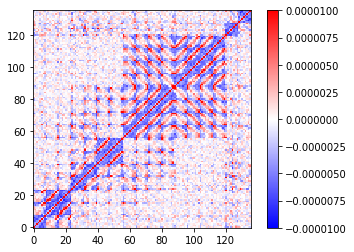

In [3]:
inv_cov_512 = get_inv_cov('512')

1000
...................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................................

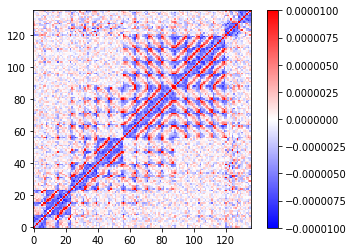

In [4]:
inv_cov_256 = get_inv_cov('256')

In [6]:
_read_nnbar('known', 'mainhighz', '512', inv_cov=inv_cov_512)
_read_nnbar('all', 'mainhighz', '512', inv_cov=inv_cov_512)
_read_nnbar('known', 'lowmidhighz', '512', inv_cov=inv_cov_512)
_read_nnbar('all', 'lowmidhighz', '512', inv_cov=inv_cov_512)

known, mainhighz   , 512, 215.9
all  , mainhighz   , 512, 205.3
known, lowmidhighz , 512, 223.9
all  , lowmidhighz , 512, 209.0


In [7]:
_read_nnbar('known', 'mainhighz', '256', inv_cov=inv_cov_256)
_read_nnbar('all', 'mainhighz', '256', inv_cov=inv_cov_256)
_read_nnbar('known', 'lowmidhighz', '256', inv_cov=inv_cov_256)
_read_nnbar('all', 'lowmidhighz', '256', inv_cov=inv_cov_256)

known, mainhighz   , 256, 532.8
all  , mainhighz   , 256, 580.4
known, lowmidhighz , 256, 631.3
all  , lowmidhighz , 256, 604.2


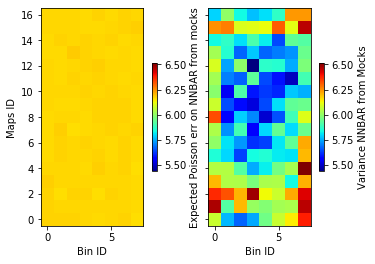

In [6]:
# vmin = min(err_p_m.min(), err_j_m.min())
# vmax = max(err_p_m.max(), err_j_m.max())
# fig, ax = plt.subplots(ncols=2, sharey=True)
# fig.subplots_adjust(wspace=0., hspace=0.0)


# kw = dict(cmap=plt.cm.jet, vmin=1.0e3*vmin, vmax=1.0e3*vmax, origin='lower')
# kw2 = dict(orientation='vertical', shrink=0.5)

# map1 = ax[0].imshow(err_p_m*1.0e3, **kw)
# cbar1 = fig.colorbar(map1, ax=ax[0], **kw2)
# cbar1.set_label('Expected Poisson err on NNBAR from mocks')

# map2 = ax[1].imshow(err_j_m*1.0e3, **kw)
# cbar2 = fig.colorbar(map2, ax=ax[1], **kw2)
# cbar2.set_label('Variance NNBAR from Mocks')

# ax[0].set_yticks(np.arange(0, 17, 2))
# ax[0].set_ylabel('Maps ID')
# for axi in ax:axi.set_xlabel('Bin ID')

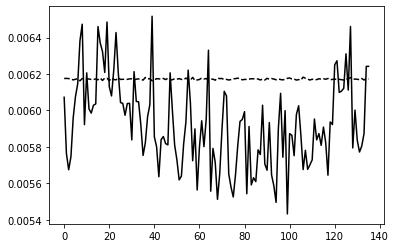

In [7]:
plt.plot(err_j_m.flatten(), 'k-',
         err_p_m.flatten(), 'k--')

In [24]:
def run_chi2(m):


    print('Fiducial:', (((nnbar - 1)/nnbar_err)**2).sum())
    print('Dispersion:', (((nnbar - 1)/err_j_m.flatten())**2).sum())
    print('Poisson:', (((nnbar - 1)/err_p_m.flatten())**2).sum())

In [25]:
run_chi2('known')

[0.99613099 0.99721439 1.00143933 1.00533511 0.99675434 1.01084793
 0.99194111 1.0003369 ]
Fiducial: 154.40141046299982
Dispersion: 157.5352617154637
Poisson: 146.3343292439966


In [26]:
run_chi2('all')

[0.98618238 0.99447801 1.0016978  1.00838126 1.00237958 1.01558368
 0.98954508 1.00175237]
Fiducial: 172.47742149172038
Dispersion: 169.62633230946324
Poisson: 157.49342089897317


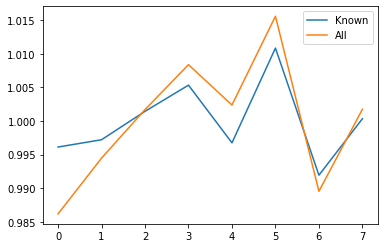

In [30]:
plt.plot([0.99613099, 0.99721439, 1.00143933, 1.00533511, 0.99675434, 1.01084793, 0.99194111, 1.0003369 ], label='Known')
plt.plot([0.98618238, 0.99447801, 1.0016978,  1.00838126, 1.00237958, 1.01558368, 0.98954508, 1.00175237], label='All')
plt.legend()

157.49342089897317